In [1]:
import pandas as pd
import numpy as np
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import json
import csv

In [2]:
location = pd.read_csv('lat_long_for_API.csv')
location.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
location.tail()

,LocationID_pickup,lon_pickup,lat_pickup,LocationID_dropoff,lon_dropoff,lat_dropoff
68893,263,-73.951209,40.778495,258,-73.856646,40.690140
68894,263,-73.951209,40.778495,259,-73.856399,40.899080
68895,263,-73.951209,40.778495,260,-73.903715,40.746790
68896,263,-73.951209,40.778495,261,-74.012919,40.708976
68897,263,-73.951209,40.778495,262,-73.945830,40.776536


In [4]:
location1 = location.loc[:1000]
location2 = location.loc[1001:30000]
location3 = location.loc[30001:]

In [5]:
#for chech purpose
len(location1), len(location1) + len(location2), len(location1) + len(location2) + len(location3)

(1001, 30001, 68898)

https://transit.api.here.com/v3/route.json
?dep=40.689515%2C-74.176778
&arr=40.625724%2C-73.826141
&time=2019-06-24T07%3A30%3A00
&app_id=CZHAUHoFYaKRZeok8OaM
&app_code=5mYVXKBCV5ROOwoURif4og
&modes=bus%2Csubway
&routing=tt
&max=1
&graph=1

https://transit.api.here.com/v3/route.json?dep=41.9773%2C-87.9019&arr=41.8961%2C-87.6552&time=2019-06-24T07%3A30%3A00&app_id=devportal-demo-20180625&app_code=9v2BkviRwi9Ot26kp2IysQ&routing=tt&forward=6

https://transit.api.here.com/v3/route.json?dep=41.9773%2C-87.9019&arr=41.8961%2C-87.6552&time=2019-06-24T07%3A30%3A00&app_id=devportal-demo-20180625&app_code=9v2BkviRwi9Ot26kp2IysQ&routing=tt&graph=1

In [35]:
lon_pickup = -74.176778
lat_pickup = 40.689515
lon_dropoff = -73.826141
lat_dropoff = 40.625724
appID = 'CZHAUHoFYaKRZeok8OaM'
appCode = '5mYVXKBCV5ROOwoURif4og'
url = str('https://route.api.here.com/routing/7.2/calculateroute.json?waypoint0={}%2C{}&waypoint1={}%2C{}&mode=fastest%3Bpedestrian&app_id={}&app_code={}'.format(lat_pickup, lon_pickup, lat_dropoff, lon_dropoff, appID, appCode))
respond = urllib.urlopen(url)
data = respond.read().decode('utf-8')
data = json.loads(data)
distance = data['response']['route'][0]['summary']['distance']
time = data['response']['route'][0]['summary']['travelTime']

In [6]:
def getWalkinginfo(lat_pickup, lon_pickup, lat_dropoff, lon_dropoff, appID, appCode):
    import pandas as pd
    try:
        import urllib2 as urllib
    except ImportError:
        import urllib.request as urllib
    import json
    
    try:
        url = str('https://route.api.here.com/routing/7.2/calculateroute.json?waypoint0={}%2C{}&waypoint1={}%2C{}&mode=fastest%3Bpedestrian&app_id={}&app_code={}'.format(lat_pickup, lon_pickup, lat_dropoff, lon_dropoff, appID, appCode))
        respond = urllib.urlopen(url)
        data = respond.read().decode('utf-8')
        data = json.loads(data)
          
        timespend = data['response']['route'][0]['summary']['travelTime']
        distance =  data['response']['route'][0]['summary']['distance']
    except:
        data = 'N/A'
        timespend = 'N/A'
        distance = 'N/A'
    
    return data, timespend, distance

In [7]:
import time, sys
from IPython.display import clear_output
def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
    block = int(round(bar_length * progress))
    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [8]:
def walking(file, data_list, time_list, distance_list, appID, appCode):
    for index, row in file.iterrows():
        lon_pickup = row[1]
        lat_pickup = row[2]
        lon_dropoff = row[4]
        lat_dropoff = row[5]

        data, timespend, distance = getWalkinginfo(lat_pickup, lon_pickup, lat_dropoff, lon_dropoff, appID, appCode)

        data_list.append(data)
        time_list.append(timespend)
        distance_list.append(distance)
       
        time.sleep(0.0001) 
        update_progress(index / len(file))
    update_progress(1)
    return data_list, time_list, distance_list

### 1st CHUNK:

In [52]:
data_list = []
time_list = []
distance_list = []
appID = 'CZHAUHoFYaKRZeok8OaM'
app_code = '5mYVXKBCV5ROOwoURif4og'
data_list1, time_list1, distance_list1 = walking(location1, data_list, time_list, distance_list, appID, app_code)

Progress: [####################] 100.0%


In [58]:
print(len(time_list1))
type(data_list1[0])

1001


dict

In [54]:
w1 = pd.DataFrame(np.column_stack([time_list1, distance_list1]), 
                   columns=['time_list1', 'distance_list1'])
w1.to_csv('walking1.csv')

In [67]:
data = {}
data['data1'] = data_list1
data1 = pd.DataFrame(data)
data1.to_csv('walkingoriginal1.csv')


### 2nd CHUNK

In [68]:
data_list = []
time_list = []
distance_list = []
appID = 'CZHAUHoFYaKRZeok8OaM'
app_code = '5mYVXKBCV5ROOwoURif4og'
data_list2, time_list2, distance_list2 = walking(location2, data_list, time_list, distance_list, appID, app_code)

Progress: [####################] 100.0%


In [70]:
print(len(time_list2))
time_list2[:10]

29000


[5238, 22366, 22178, 17210, 10034, 14942, 7415, 1105, 8245, 7386]

In [71]:
w2 = pd.DataFrame(np.column_stack([time_list2, distance_list2]), 
                   columns=['time_list2', 'distance_list2'])
w2.to_csv('walking2.csv')

In [72]:
data = {}
data['data2'] = data_list2
data2 = pd.DataFrame(data)
data2.to_csv('walkingoriginal2.csv')


### 3rd CHUNK

In [9]:
data_list = []
time_list = []
distance_list = []
appID = 'CZHAUHoFYaKRZeok8OaM'
app_code = '5mYVXKBCV5ROOwoURif4og'
data_list3, time_list3, distance_list3 = walking(location3, data_list, time_list, distance_list, appID, app_code)

Progress: [####################] 100.0%


In [11]:
print(len(time_list3))
time_list3[:10]

38897


[11955, 9394, 10967, 12738, 16770, 9685, 19004, 21798, 14047, 16109]

In [13]:
w3 = pd.DataFrame(np.column_stack([time_list3, distance_list3]), 
                   columns=['time_list3', 'distance_list3'])
w3.to_csv('walking3final.csv')

In [13]:
data = {}
data['data3'] = data_list3
data3 = pd.DataFrame(data)
data3.to_csv('walkingoriginal3.csv')


In [21]:
w1 = pd.read_csv('walking1.csv').rename(columns={'Unnamed: 0':'delete', 'distance_list1': 'distance', 'time_list1' : 'time'})[['time', 'distance']]
w2 = pd.read_csv('walking2.csv').rename(columns={'Unnamed: 0':'delete', 'distance_list2': 'distance', 'time_list2' : 'time'})
w3 = pd.read_csv('walking3.csv').rename(columns={'Unnamed: 0':'delete', 'distance_list3': 'distance', 'time_list3' : 'time'})

In [14]:
w12 = [w1, w2]
wdf12 = pd.concat(w12)[['time', 'distance']]
print(wdf12.shape)
wdf12.head()

(30001, 2)


,time,distance
0,31379.0,65155.0
1,34145.0,71302.0
2,25529.0,49169.0
3,42701.0,50553.0
4,31821.0,39772.0


### Aggregated data

In [18]:
location1.head()

,LocationID_pickup,lon_pickup,lat_pickup,LocationID_dropoff,lon_dropoff,lat_dropoff
0,1,-74.176778,40.689515,2,-73.826141,40.625724
1,1,-74.176778,40.689515,3,-73.849479,40.865871
2,1,-74.176778,40.689515,4,-73.977024,40.724151
3,1,-74.176778,40.689515,5,-74.189938,40.550339
4,1,-74.176778,40.689515,6,-74.067786,40.599053


In [22]:
w1.head()

,time,distance
0,31379.0,65155.0
1,34145.0,71302.0
2,25529.0,49169.0
3,42701.0,50553.0
4,31821.0,39772.0


In [23]:
combine1 = pd.merge(location1, w1, left_index =True, right_index=True)
#combine1['LocationID_pickup'] = combine1['LocationID_pickup'].astype(float)
print(combine1.shape)
combine1 = combine1.dropna()
combine1['LocationID_pickup'] = combine1['LocationID_pickup'].astype(int)
print(combine1.shape)
combine1.head()

(1001, 8)
(997, 8)


,LocationID_pickup,lon_pickup,lat_pickup,LocationID_dropoff,lon_dropoff,lat_dropoff,time,distance
0,1,-74.176778,40.689515,2,-73.826141,40.625724,31379.0,65155.0
1,1,-74.176778,40.689515,3,-73.849479,40.865871,34145.0,71302.0
2,1,-74.176778,40.689515,4,-73.977024,40.724151,25529.0,49169.0
3,1,-74.176778,40.689515,5,-74.189938,40.550339,42701.0,50553.0
4,1,-74.176778,40.689515,6,-74.067786,40.599053,31821.0,39772.0


In [24]:
combine1.to_csv('walkingTest')

In [67]:
combine1.tail()

,LocationID_pickup,lon_pickup,lat_pickup,LocationID_dropoff,lon_dropoff,lat_dropoff,Unnamed: 0,duration_list1,transfer_list1,modelist_list1,price
996,4,-73.977024,40.724151,212,-73.869905,40.828291,996,PT01H09M,1.0,"[20, 5, 20, 7, 20]",2.75
997,4,-73.977024,40.724151,213,-73.860761,40.816468,997,PT01H23M,2.0,"[20, 5, 20, 7, 20, 5, 20]",5.50
998,4,-73.977024,40.724151,214,-74.085885,40.586618,998,PT01H16M,2.0,"[20, 5, 20, 7, 20, 5, 20]",5.50
999,4,-73.977024,40.724151,215,-73.790393,40.694168,999,PT01H27M,2.0,"[20, 5, 20, 7, 20, 5, 20]",5.50
1000,4,-73.977024,40.724151,216,-73.820513,40.677070,1000,PT01H10M,3.0,"[20, 5, 20, 7, 7, 20, 5, 20]",8.25


In [58]:
type(combine1['LocationID_pickup'])

pandas.core.series.Series

In [56]:
combine1['duration_list1'][pd.isnull(combine1['duration_list1'])]

Series([], Name: duration_list1, dtype: object)

In [68]:
results1 = pd.merge(combine1, wage, left_on='LocationID_pickup', right_on='OBJECTID', how='left')
results1 = results1.drop(['Unnamed: 0', 'transfer_list1', 'modelist_list1', 'OBJECTID'], axis=1)
results1.dropna(inplace=True)
results1.shape

(467, 19)

In [69]:
results1.head()

,LocationID_pickup,lon_pickup,lat_pickup,LocationID_dropoff,lon_dropoff,lat_dropoff,duration_list1,price,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000
514,3,-73.849479,40.865871,1,-74.176778,40.689515,PT02H08M,2.75,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
515,3,-73.849479,40.865871,2,-73.826141,40.625724,PT02H20M,5.50,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
516,3,-73.849479,40.865871,4,-73.977024,40.724151,PT01H23M,2.75,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
517,3,-73.849479,40.865871,5,-74.189938,40.550339,PT02H44M,5.50,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
518,3,-73.849479,40.865871,6,-74.067786,40.599053,PT01H50M,2.75,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667


In [34]:
s = 'PT35M'

In [35]:
try:
    print(int(s.split('H')[0][-2:])*3600 + int(s[-3:-1])*60)
except:
    print(int(s[-3:-1])*60)

2100


In [36]:
try:
    results1['duration_list1'] = results1['duration_list1'].map(lambda x: int(x.split('H')[0][-2:])*3600 + int(x.split('M')[0][-2:])*60)
except:
    results1['duration_list1'] = results1['duration_list1'].map(lambda x: int(x.split('M')[0][-2:])*60)

In [37]:
results1.rename(columns={'LocationID_pickup':'TZ_pickup', 'LocationID_dropoff':'TZ_dropoff', 'duration_list1':'trip_duration(s)'}, inplace=True)
results1.head(10)

,TZ_pickup,lon_pickup,lat_pickup,TZ_dropoff,lon_dropoff,lat_dropoff,trip_duration(s),price,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000
524,3,-73.849479,40.865871,1,-74.176778,40.689515,480,2.75,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
525,3,-73.849479,40.865871,2,-73.826141,40.625724,1200,5.50,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
526,3,-73.849479,40.865871,4,-73.977024,40.724151,1380,2.75,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
527,3,-73.849479,40.865871,5,-74.189938,40.550339,2640,5.50,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
528,3,-73.849479,40.865871,6,-74.067786,40.599053,3000,2.75,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
529,3,-73.849479,40.865871,7,-73.921483,40.761094,540,2.75,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
530,3,-73.849479,40.865871,8,-73.923201,40.778608,1260,2.75,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
531,3,-73.849479,40.865871,9,-73.788019,40.754399,840,5.50,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
532,3,-73.849479,40.865871,10,-73.791655,40.678103,2820,8.25,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
533,3,-73.849479,40.865871,11,-74.010615,40.603977,2760,2.75,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667


In [38]:
results1.shape

(467, 19)

In [6]:
pt1 = pd.read_csv('pt1.csv')
pt2 = pd.read_csv('pt2.csv')
pt3 = pd.read_csv('pt3.csv')

In [7]:
pt1.rename(columns={'duration_list1':'duration_list', 'transfer_list1':'transfer_list', 'modelist_list1':'modelist_list'}, inplace=True)
pt2.rename(columns={'duration_list2':'duration_list', 'transfer_list2':'transfer_list', 'modelist_list2':'modelist_list'}, inplace=True)
pt3.rename(columns={'duration_list3':'duration_list', 'transfer_list3':'transfer_list', 'modelist_list3':'modelist_list'}, inplace=True)
pt3.head()

,Unnamed: 0,duration_list,transfer_list,modelist_list
0,0,PT01H36M,1.0,"[20, 5, 20, 7, 20]"
1,1,PT01H23M,1.0,"[20, 5, 20, 7, 20]"
2,2,PT01H32M,2.0,"[20, 5, 20, 7, 7, 20]"
3,3,PT01H38M,2.0,"[20, 5, 20, 7, 20, 7, 20]"
4,4,PT01H51M,1.0,"[20, 5, 20, 7, 20]"


In [12]:
wage = pd.read_csv('taxi_zone_income_probabilities.csv')
print(wage.shape)
wage = wage.dropna()
print(wage.shape)
wage['OBJECTID'] = wage['OBJECTID'].astype(int)
wage.head()

(261, 12)
(258, 12)


,OBJECTID,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000
1,3,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.111880,0.156432,0.097823,0.123454,0.085667
2,4,0.070217,0.083930,0.116010,0.065062,0.063911,0.082528,0.103498,0.139483,0.068065,0.119664,0.087633
3,5,0.022104,0.017794,0.033488,0.023873,0.024204,0.057140,0.112290,0.172745,0.106432,0.199934,0.229996
4,6,0.050462,0.032627,0.046169,0.041018,0.038325,0.068415,0.087890,0.119658,0.118487,0.151192,0.245756
5,7,0.036846,0.040742,0.047700,0.042512,0.033512,0.060563,0.085262,0.121233,0.103446,0.147674,0.280510


In [8]:
#pd.merge(location3, pt3, left_index =True, right_index=True)

In [138]:
pt2 = pt2.dropna()
test = pt2[(pt2['duration_list'].str.contains('H7'))]#& (pt2['duration_list'].str.len()!=8)]
test.duration_list.map(lambda x: int(x.split('T')[1].split('H')[0])*3600 + int(x.split('H')[1].split('M')[0])*60 if len(x)>5 
                       else int(x.split('T')[1].split('M')[0])*60)

2601     4020
5611     7620
10860    4020
10949    4020
10979    4020
13062    4020
25636    4020
Name: duration_list, dtype: int64

In [135]:
pt2['price'] = pt2['transfer_list']*2.75
combine1 = pd.merge(location2, pt2, left_index =True, right_index=True)
combine2 = pd.merge(combine1, wage, left_on='LocationID_pickup', right_on='OBJECTID', how='left')
combine2 = combine2.drop(['Unnamed: 0', 'transfer_list', 'modelist_list', 'OBJECTID'], axis=1)
combine2.dropna(inplace=True)
if combine2['duration_list'].str.len()>5:
    combine2['duration_list'] = combine2['duration_list'].map(lambda x: int(x.split('T')[1].split('H')[0])*3600 + int(x.split('H')[1].split('M')[0])*60)
else:
#     print(combine2['duration_list'])
    combine2['duration_list'] = combine2['duration_list'].map(lambda x: int(x.split('T')[1].split('M')[0])*60)
# combine2.rename(columns={'LocationID_pickup':'TZ_pickup', 'LocationID_dropoff':'TZ_dropoff', 'duration_list':'trip_duration(s)'}, inplace=True)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [20]:
def covertToDf(pt, location, wage):    
    pt['price'] = pt['transfer_list']*2.75 + 2.75
    locationRI = location.reset_index(drop=True)
    combine1 = pd.merge(locationRI, pt, left_index =True, right_index=True)
    combine2 = pd.merge(combine1, wage, left_on='LocationID_pickup', right_on='OBJECTID', how='left')
    combine2 = combine2.drop(['Unnamed: 0', 'transfer_list', 'modelist_list', 'OBJECTID'], axis=1)
    combine2.dropna(inplace=True)
    combine2['duration_list'] = combine2['duration_list'].map(lambda x: int(x.split('T')[1].split('H')[0])*3600 
                                                              + int(x.split('H')[1].split('M')[0])*60 if len(x)>5 
                                                              else int(x.split('T')[1].split('M')[0])*60)

    combine2.rename(columns={'LocationID_pickup':'TZ_pickup', 'LocationID_dropoff':'TZ_dropoff', 'duration_list':'trip_duration(s)'}, inplace=True)
    return combine2

In [21]:
results1 = covertToDf(pt1, location1, wage)
print(results1.shape)
results1.head()

(467, 19)


,TZ_pickup,lon_pickup,lat_pickup,TZ_dropoff,lon_dropoff,lat_dropoff,trip_duration(s),price,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000
524,3,-73.849479,40.865871,1,-74.176778,40.689515,7680,5.50,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
525,3,-73.849479,40.865871,2,-73.826141,40.625724,8400,8.25,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
526,3,-73.849479,40.865871,4,-73.977024,40.724151,4980,5.50,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
527,3,-73.849479,40.865871,5,-74.189938,40.550339,9840,8.25,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
528,3,-73.849479,40.865871,6,-74.067786,40.599053,6600,5.50,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667


In [22]:
results2 = covertToDf(pt2, location2, wage)
print(results2.shape)
results2.head()

(27433, 19)


,TZ_pickup,lon_pickup,lat_pickup,TZ_dropoff,lon_dropoff,lat_dropoff,trip_duration(s),price,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000
0,4,-73.977024,40.724151,217,-73.956841,40.703251,2520,5.50,0.070217,0.08393,0.11601,0.065062,0.063911,0.082528,0.103498,0.139483,0.068065,0.119664,0.087633
1,4,-73.977024,40.724151,218,-73.772117,40.673302,5880,8.25,0.070217,0.08393,0.11601,0.065062,0.063911,0.082528,0.103498,0.139483,0.068065,0.119664,0.087633
2,4,-73.977024,40.724151,219,-73.761009,40.660257,6240,8.25,0.070217,0.08393,0.11601,0.065062,0.063911,0.082528,0.103498,0.139483,0.068065,0.119664,0.087633
3,4,-73.977024,40.724151,220,-73.911881,40.881892,4920,5.50,0.070217,0.08393,0.11601,0.065062,0.063911,0.082528,0.103498,0.139483,0.068065,0.119664,0.087633
4,4,-73.977024,40.724151,221,-74.081329,40.620232,4620,11.00,0.070217,0.08393,0.11601,0.065062,0.063911,0.082528,0.103498,0.139483,0.068065,0.119664,0.087633


In [23]:
results3 = covertToDf(pt3, location3, wage)
print(results3.shape)
results3.head()

(37636, 19)


,TZ_pickup,lon_pickup,lat_pickup,TZ_dropoff,lon_dropoff,lat_dropoff,trip_duration(s),price,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000
0,115,-74.092474,40.620141,143,-73.987973,40.775771,5760,5.50,0.055575,0.049561,0.038807,0.032227,0.045422,0.079984,0.08897,0.122011,0.089147,0.125831,0.272464
1,115,-74.092474,40.620141,144,-73.997407,40.720581,4980,5.50,0.055575,0.049561,0.038807,0.032227,0.045422,0.079984,0.08897,0.122011,0.089147,0.125831,0.272464
2,115,-74.092474,40.620141,145,-73.948693,40.746594,5520,8.25,0.055575,0.049561,0.038807,0.032227,0.045422,0.079984,0.08897,0.122011,0.089147,0.125831,0.272464
3,115,-74.092474,40.620141,146,-73.933639,40.754524,5880,8.25,0.055575,0.049561,0.038807,0.032227,0.045422,0.079984,0.08897,0.122011,0.089147,0.125831,0.272464
4,115,-74.092474,40.620141,147,-73.898192,40.819199,6660,5.50,0.055575,0.049561,0.038807,0.032227,0.045422,0.079984,0.08897,0.122011,0.089147,0.125831,0.272464


In [24]:
subway_final = pd.concat([results1, results2, results3])
print(subway_final.shape)
subway_final.head()

(65536, 19)


,TZ_pickup,lon_pickup,lat_pickup,TZ_dropoff,lon_dropoff,lat_dropoff,trip_duration(s),price,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000
524,3,-73.849479,40.865871,1,-74.176778,40.689515,7680,5.50,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
525,3,-73.849479,40.865871,2,-73.826141,40.625724,8400,8.25,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
526,3,-73.849479,40.865871,4,-73.977024,40.724151,4980,5.50,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
527,3,-73.849479,40.865871,5,-74.189938,40.550339,9840,8.25,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667
528,3,-73.849479,40.865871,6,-74.067786,40.599053,6600,5.50,0.041803,0.060036,0.108075,0.047035,0.069126,0.098668,0.11188,0.156432,0.097823,0.123454,0.085667


In [26]:
subway_final.to_csv('PublicTransit_clean.csv')

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline

In [182]:
print('The Statistic Description of Trip Duration of PT:')
subway_final.describe()['trip_duration(s)']

The Statistic Description of Trip Duration of PT:


count    65536.000000
mean      4530.845032
std       1846.879885
min        360.000000
25%       3180.000000
50%       4380.000000
75%       5760.000000
max      12780.000000
Name: trip_duration(s), dtype: float64

Text(0.5, 1.0, 'The distributon of commute time using Public Transportation (subway&bus)')

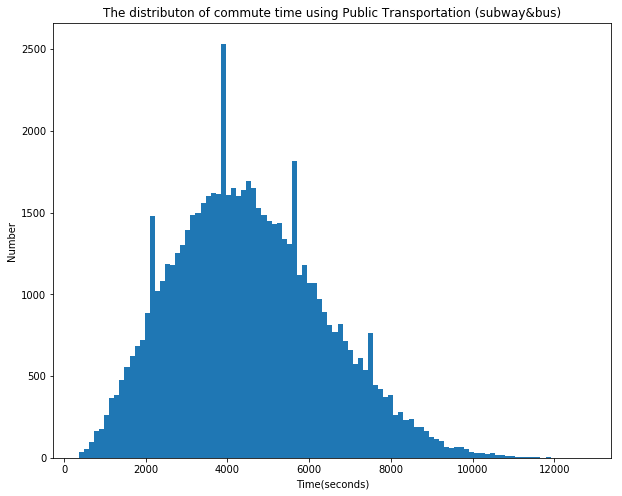

In [177]:
fig = plt.figure(figsize=(10,8))
plt.hist(subway_final['trip_duration(s)'], 100)
plt.xlabel('Time(seconds)')
plt.ylabel('Number')
plt.title('The distributon of commute time using Public Transportation (subway&bus)')